<a href="https://colab.research.google.com/github/spentaur/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import scipy.stats as st
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [3]:
sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

def mean(data):
    return sum(data) / len(data)

def variance(data, ddof=0):
    meanData = mean(data)
    return sum([((i - meanData)**2) for i in data]) / (len(data) - ddof)

def standardDeviation(data, ddof=0):
    return variance(data, ddof)**.5

mean(sales), variance(sales, 1), standardDeviation(sales, 1)

(3052.714285714286, 214387.90476190473, 463.0204150595357)

In [4]:
np.mean(sales), np.var(sales, ddof=1), np.std(sales, ddof=1)

(3052.714285714286, 214387.90476190473, 463.0204150595357)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [5]:
numOfCustomers = np.array([127, 80, 105, 92, 120, 115, 93])

np.cov(sales,numOfCustomers)[0][1]

7604.357142857142

In [6]:
# calc mean for each
salesMean = mean(sales)
customersMean = mean(numOfCustomers)
# find the difference between each value and mean price.
salesDifInMean = sales - salesMean
customerDifInMean = numOfCustomers - customersMean
# Multiply the results obtained in the previous step.
difMult = sum(salesDifInMean * customerDifInMean)
# average
covariance = difMult / (len(sales) - 1)
covariance

7604.357142857142

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [7]:
custStd = numOfCustomers.std(ddof=1)
salesStd = sales.std(ddof=1)

covariance / (custStd * salesStd)

0.9628339778148909

In [8]:
np.corrcoef(sales, numOfCustomers)[0][1]

0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 16 columns):
Unnamed: 0          1310 non-null int64
pclass              1309 non-null float64
survived            1309 non-null float64
name                1309 non-null object
sex                 1309 non-null object
age                 1310 non-null float64
sibsp               1309 non-null float64
parch               1309 non-null float64
ticket              1309 non-null object
fare                1308 non-null float64
cabin               295 non-null object
embarked            1310 non-null object
boat                486 non-null object
body                121 non-null float64
home.dest           745 non-null object
has_cabin_number    1310 non-null int64
dtypes: float64(7), int64(2), object(7)
memory usage: 163.8+ KB


In [10]:
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


In [11]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

(0, 5)

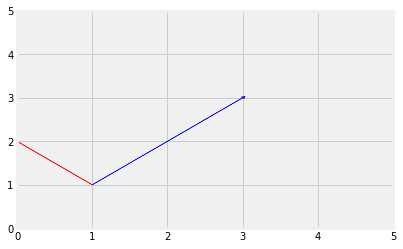

In [12]:
vec1 = [2,2]
plt.arrow(1,1,-2,2,head_width=.05, head_length=0.05, color ='red')
plt.arrow(1,1,2,2,head_width=.05, head_length=0.05, color ='blue')
plt.xlim(0,5)
plt.ylim(0,5)

# perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [13]:
(-5*6) + (3*-8) + (7*2)
# dot product is not 0

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [14]:
(2**2 + (-15)**2 + 6**2 + 20**2)

665

In [15]:
4 + 225 + 36 + 400

665

In [16]:
# c = np.array([[2, -15, 6, 20]])
# np.matmul(c, c.T)[0][0]
# i thining that's what you're asking for?
# but i'm confused about the order..
(2*2) + (-15 * -15) + (6 * 6) + (20 * 20)

665

In [0]:
# all of them are just c dot c

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$7\hat{\imath} + 12\hat{\jmath}$

$2\hat{\imath} + 11\hat{\jmath} + -8\hat{k}$



## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [18]:
f = np.array([4,12,11,9,2])
normf = np.linalg.norm(f)

print((1/normf) * f)
print(f / normf)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]
[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

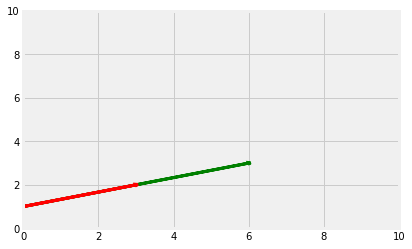

In [19]:
# dependent
plt.xlim(0,10)
plt.ylim(0,10)
plt.arrow(0, 1, 6, 2, linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 1, 3, 1, linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.show()

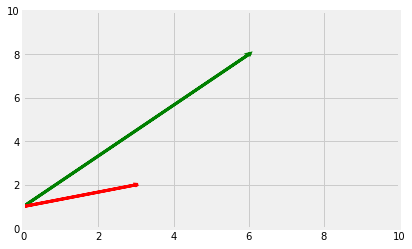

In [20]:
# independent
plt.xlim(0,10)
plt.ylim(0,10)
plt.arrow(0, 1, 6, 7, linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 1, 3, 1, linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# these vectors are dependent, meaning they occupy the same line
# so the span is anything on that line
# so if we scale g by x and h by y no matter what they will be on the same line 

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

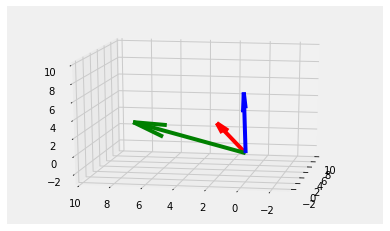

In [22]:
# span is all of 3d space

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-3, 10])
ax.set_ylim([-3, 10])
ax.set_zlim([-3, 10])
ax.quiver(0, 0, 0, 1, 2, 3, color="red")
ax.quiver(0, 0, 0, -1, 0, 7, color="blue")
ax.quiver(0, 0, 0, 4, 8, 2, color="green")
ax.view_init(15, 190)

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



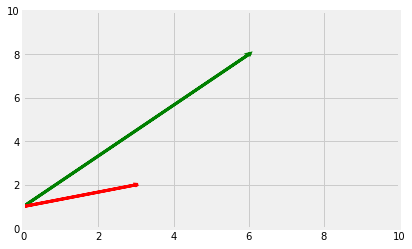

In [23]:
plt.xlim(0,10)
plt.ylim(0,10)
plt.arrow(0, 1, 6, 7, linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 1, 3, 1, linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.show()

## 6.2 What does it mean to form a basis?

it means you can span the whole space



# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [24]:
p = np.array([[1, 2, 3],
              [-1, 0, 7],
              [4, 8, 2]])

np.linalg.matrix_rank(p)

3

In [25]:
p = np.array([[1, 2],
              [-1, 0],
              [4, 8]])

np.linalg.matrix_rank(p)

2

## 7.2 What does the rank of a matrix tell us?

it tells us the dimensions of the vector space that the columns span

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

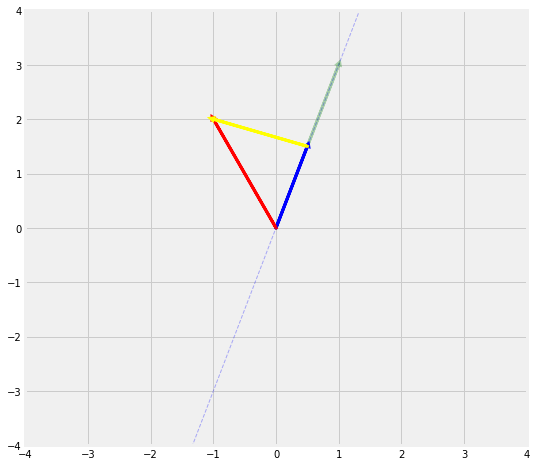

In [45]:
plt.figure(figsize=(8,8))
plt.xlim(-4,4)          
plt.ylim(-4,4)
# Original Vector
v = [1,3] 
w = [-1,2]
proj = np.multiply(np.dot(v,w)/np.dot(v,v), v)
x_minus_proj = w-proj

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

plt.plot(x_vals, y_vals, '--', color='b', linewidth=1, alpha=.3)
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green', alpha=.3)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(proj[0], proj[1], x_minus_proj[0], x_minus_proj[1], linewidth=3, head_width=.05, head_length=0.05, color = 'yellow')
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
def proj_y_equal_x(xvals,yvals):
    projections = []
    x_minus_projections = []
    for x,y in zip(x_values, y_values):
        projections.append(np.multiply(np.dot([x,x],[x,y])/np.dot([x,x],[x,x]), [x,x]))

    return np.array(projections)

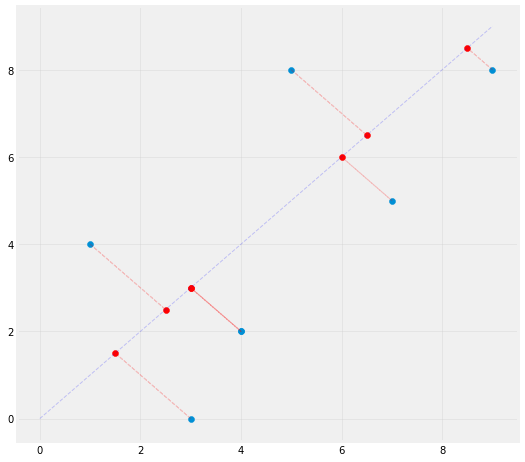

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

plt.figure(figsize=(8,8))
plt.grid(alpha=.3)
axes = plt.gca()

x_vals = np.array([0,9])
y_vals = x_vals 

plt.plot(x_vals, y_vals, '--', color='b', linewidth=1, alpha=.2)

plt.scatter(x_values, y_values)

for x,y in zip(x_values, y_values):
    proj = np.multiply(np.dot([x,x],[x,y])/np.dot([x,x],[x,x]), [x,x])
    x_minus_proj = [x,y]-proj
    plt.arrow(proj[0], proj[1], x_minus_proj[0], x_minus_proj[1], linewidth=1, linestyle='dashed', color = 'red', alpha=0.2)
    plt.scatter(proj[0], proj[1], color="red")
plt.show()

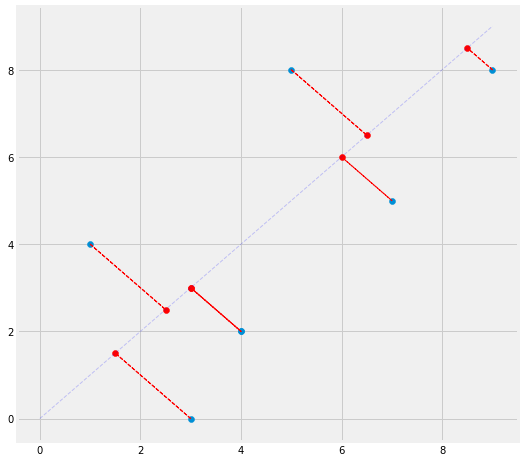

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]
plt.figure(figsize=(8,8))
axes = plt.gca()

x_vals = np.array([0,9])
y_vals = x_vals

plt.plot(x_vals, y_vals, '--', color='b', linewidth=1, alpha=.2)

plt.scatter(x_values, y_values)

projs = proj_y_equal_x(x_values, y_values)

xy = np.array([x_values, y_values]).T

x_minus_proj =  xy - projs

for (projsx, projsy), (xminusx, xminusy) in zip(projs, x_minus_proj):
    plt.arrow(projsx, projsy, xminusx, xminusy, linewidth=1, linestyle='dashed', color = 'red')
    
plt.scatter(projs[:, 0], projs[:, 1], color="red")
plt.show()